In [146]:
import numpy as np
from numpy.linalg import inv
from numpy import matmul as mul
import matplotlib.pyplot as plt
from matplotlib import animation
# from matplotlib.animation import PillowWriter
from scipy.sparse import diags as sdiags

# Crank Nicolson Scheme

$\partial_{\tau} \psi = \frac{\hbar}{2}\Delta^{2} \psi$
$$\frac{v_{m}^{n+1} - v_{m}^{n}}{\Delta \tau} = 
\frac{\nu}{2}\left[\frac{v_{m+1}^{n+1} - 2v_{m}^{n+1} + v_{m-1}^{n+1}}{\left(\Delta x\right)^{2}}
+ \frac{v_{m+1}^{n} - 2v_{m}^{n} + v_{m-1}^{n}}{\left({\Delta x}\right)^{2}}\right]$$
where $\nu$ is $\frac{\hbar}{2m}$

$\sigma = \frac{\nu \Delta t}{2 \Delta x^{2}}$

In [2]:
t0 = 0
tf = 10
L = 10
x0 = 0
xf = L   

In [127]:
def initial_cond(x, L):
    init = np.sin(2*np.pi*x/L)
    return init


In [ ]:
def potential(x):
    

In [136]:
def mesh(mu, h, x0, xf, t0, tf):
    '''
    Parameters
    mu : dt/dx^2
    h = dx
    x0, xf, t0, tf
    '''
    k = mu*(h**2)
    
    x = np.linspace(x0, xf, int((xf-x0)//h) + 1)
    t = np.linspace(t0, tf, int((tf-t0)//k) + 1)
    # print(x.size)
    xx, _ = np.meshgrid(x, t)
    u = np.zeros_like(xx)
    # print(u.shape)
    u[0, :] = initial_cond(x, L)
    return u, x



In [137]:
def matrix(mu,u):
    ll = u
    maindiag = np.zeros(ll)
    maindiag[:] = 2*(1+mu)
    subdiag = np.zeros(ll-1)
    subdiag[:] = mu
    A = sdiags([maindiag, subdiag, subdiag], [0,1,-1]).toarray()

    maindiag2 = np.zeros_like(maindiag)
    maindiag2[:] = 2*(1-mu)

    B = sdiags([maindiag2, subdiag, subdiag], [0,1,-1]).toarray()
    return inv(A), B

    

In [138]:
def solver(u, mu, A, B, DL, DR):
    sol = mul(A, B)
    bj = np.zeros_like(u)
    bj[0] = mu*DL ; bj[-1] = mu*DR
    # bj1[0] = mu*DL ; bj[-1] = mu*DR

    v = mul(sol, u) + bj
    return v

In [139]:
def cn(mesh, mu, DL, DR):
    
    mat1, mat2 = matrix(mu, mesh.shape[1])
    for i in range(mesh.shape[0] - 1):
        mesh[i+1, :] = solver(mesh[i, :], mu, mat1, mat2, DL, DR)
    return mesh


In [140]:
mu = 0.1
h = 0.1

In [141]:
grid, x = mesh(mu, h, x0, xf, t0, tf)

In [142]:
u = cn(grid, mu, 0, 0)

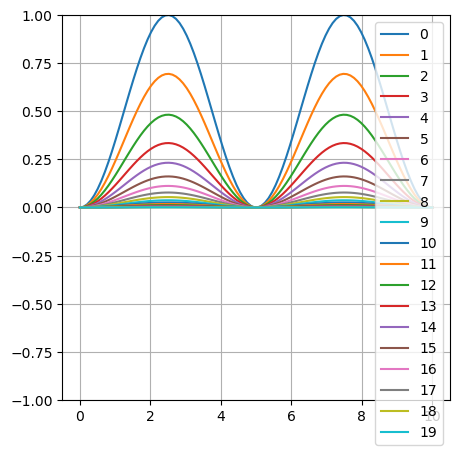

In [145]:
plt.figure(figsize=(5,5))
plt.ylim(-1, 1)
for i in range(0,20):
    plt.plot(x, u[i, :]**2, label=f"{i}")
plt.grid(True)
plt.legend()
plt.show()